## 2.2 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sci
import scipy.optimize as opt
from scipy.optimize import fsolve
import csv

[['CAN3.245 Aug 27', 0.03245, 4.58, 28.687400760727634], ['CAN2.75 Sep 27', 0.0275, 4.67, 10.548096902311025], ['CAN3.5 Mar 28', 0.035, 5.17, 9.494232459077264], ['CAN2 Jun 28', 0.02, 5.42, 8.340338052889386], ['CAN2.25 Jun 29', 0.0225, 6.42, 3.81883599729449], ['CAN5.75 Jun 29', 0.0575, 6.42, 3.1759266856935238], ['CAN2.25 Dec 29', 0.0225, 6.92, 2.9876827395321346], ['CAN0.5 Dec 30', 0.005, 7.92, 2.6832079801259887], ['CAN1.5 Jun 31', 0.015, 8.42, 1.90771973425685], ['CAN1.5 Dec 31', 0.015, 8.92, 1.6710821825955693]]


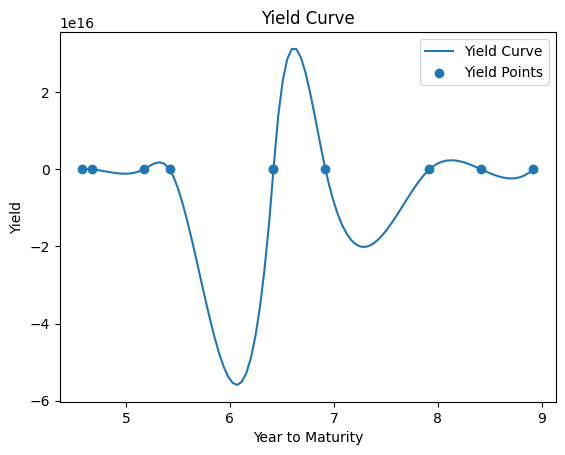

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sci
import scipy.optimize as opt
from scipy.optimize import fsolve
import csv


with open('datas.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = [line for line in csv_reader]
    
df = pd.DataFrame(data)


def calculateYTM(price_list, coupon, year_to_maturity):
    def f(x):
        ytm = 0
        for p in price_list:
            ytm += p / ((1 + x/2) ** (2 * (year_to_maturity - price_list.index(p) / 2)))
        ytm -= coupon * 2 * year_to_maturity
        return ytm
    return f


yield_list = []
for i in range(1,11):
    bond_name = df.iloc[i,0]
    coupon = float(df.iloc[i,2])
    year_to_maturity = float(df.iloc[i,8])
    price_list = df.iloc[i,11:19].astype(float).tolist()
    ytm = fsolve(calculateYTM(price_list, coupon, year_to_maturity), 0.05)
    yield_list.append([bond_name, coupon, year_to_maturity, ytm[0]])

print(yield_list)


yield_df = pd.DataFrame(yield_list, columns=['bond_name','coupon','year_to_maturity','ytm'])


x = yield_df['year_to_maturity'].tolist()
y = yield_df['ytm'].tolist()


x_new = np.linspace(min(x), max(x), 100)
tck = sci.splrep(x, y, s=0)
y_new = sci.splev(x_new, tck, der=0)


plt.plot(x_new, y_new, label='Yield Curve')
plt.scatter(x, y, label='Yield Points')
plt.xlabel('Year to Maturity')
plt.ylabel('Yield')
plt.title('Yield Curve')
plt.legend()
plt.show()


In [2]:
with open('datas.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = [line for line in csv_reader]
    
df = pd.DataFrame(data)

In [3]:
df.head

<bound method NDFrame.head of                  0             1        2           3                 4   \
0         Bond Name          ISIN   Coupon  Issue Date  last coupon date   
1   CAN3.245 Aug 27  CA135087P733  0.03245   2022/12/2         2022/12/2   
2    CAN2.75 Sep 27  CA135087N837   0.0275   2022/5/13        2022/11/13   
3     CAN3.5 Mar 28  CA135087P576    0.035  2022/10/21        2022/10/21   
4       CAN2 Jun 28  CA135087H235     0.02    2017/8/1          2022/8/1   
5    CAN2.25 Jun 29  CA135087J397   0.0225   2018/7/27         2022/7/27   
6    CAN5.75 Jun 29  CA135087WL43   0.0575    1998/2/2          2022/8/2   
7    CAN2.25 Dec 29  CA135087N670   0.0225   2022/3/29         2022/9/29   
8     CAN0.5 Dec 30  CA135087L443    0.005   2020/10/5         2022/10/5   
9     CAN1.5 Jun 31  CA135087M276    0.015   2021/4/26        2022/10/26   
10    CAN1.5 Dec 31  CA135087N266    0.015  2021/10/25        2022/10/25   

                     5                        6          

In [90]:
def calculateYTM(price_list, coupon, year_to_maturity):
    def f(x):
        ytm = 0
        for p in price_list:
            ytm += p / ((1 + x/2) ** (2 * (year_to_maturity - price_list.index(p) / 2)))
        ytm -= coupon * 2 * year_to_maturity
        return ytm
    return f

In [13]:
yield_list = []
for i in range(1,11):
    bond_name = df.iloc[i,0]
    coupon = float(df.iloc[i,2])
    year_to_maturity = float(df.iloc[i,8])
    price_list = df.iloc[i,11:19].astype(float).tolist()
    ytm = fsolve(calculateYTM(price_list, coupon, year_to_maturity), 0.05)
    yield_list.append([bond_name, coupon, year_to_maturity, ytm[0]])

print(yield_list)

[['CAN3.245 Aug 27', 0.03245, 4.58, 28.687400760727634], ['CAN2.75 Sep 27', 0.0275, 4.67, 10.548096902311025], ['CAN3.5 Mar 28', 0.035, 5.17, 9.494232459077264], ['CAN2 Jun 28', 0.02, 5.42, 8.340338052889386], ['CAN2.25 Jun 29', 0.0225, 6.42, 3.81883599729449], ['CAN5.75 Jun 29', 0.0575, 6.42, 3.1759266856935238], ['CAN2.25 Dec 29', 0.0225, 6.92, 2.9876827395321346], ['CAN0.5 Dec 30', 0.005, 7.92, 2.6832079801259887], ['CAN1.5 Jun 31', 0.015, 8.42, 1.90771973425685], ['CAN1.5 Dec 31', 0.015, 8.92, 1.6710821825955693]]


In [14]:
yield_df = pd.DataFrame(yield_list, columns=['bond_name','coupon','year_to_maturity','ytm'])

In [93]:
x = yield_df['year_to_maturity'].tolist()
y = yield_df['ytm'].tolist()

In [94]:
x_new = np.linspace(min(x), max(x), 100)
tck = sci.splrep(x, y, s=0)
y_new = sci.splev(x_new, tck, der=0)

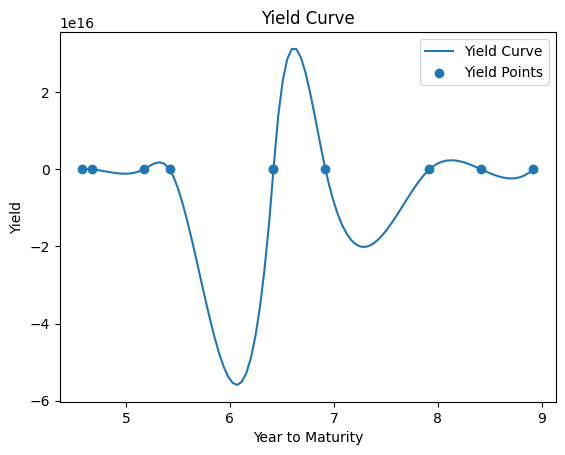

In [95]:
plt.plot(x_new, y_new, label='Yield Curve')
plt.scatter(x, y, label='Yield Points')
plt.xlabel('Year to Maturity')
plt.ylabel('Yield')
plt.title('Yield Curve')
plt.legend()
plt.show()

In [60]:
# Pseudo-code:

# 1. Read in the bond data from csv file
# 2. Calculate the yield-to-maturity (YTM) of each bond
# 3. For each day, calculate the spot rate corresponding to the terms ranging from 1-5 years
#     a. For each bond, calculate the spot rate by discounting the cashflows received in the respective years 
#     b. Assume the cashflow received in the first year is the coupon for that bond
# 4. Plot the 5-year spot rate corresponding to each day of data
# 5. Label the plot and add title
# 6. Show the plot

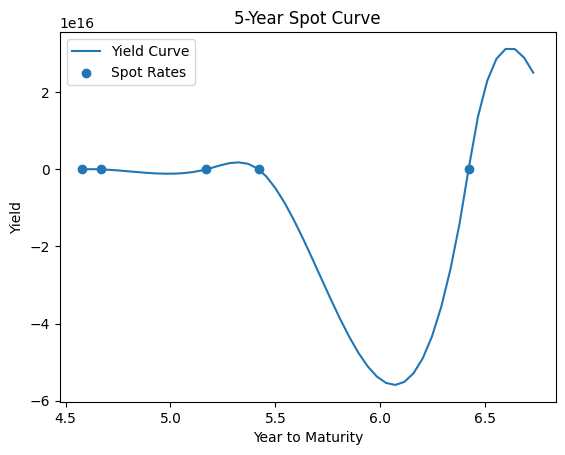

In [78]:
yield_list = []
for i in range(1,11):
    bond_name = df.iloc[i,0]
    coupon = float(df.iloc[i,2])
    year_to_maturity = float(df.iloc[i,8])
    price_list = df.iloc[i,11:19].astype(float).tolist()
    ytm = fsolve(calculateYTM(price_list, coupon, year_to_maturity), 0.05)
    yield_list.append([bond_name, coupon, year_to_maturity, ytm[0]])


yield_df = pd.DataFrame(yield_list, columns=['bond_name','coupon','year_to_maturity','ytm'])



x = yield_df['year_to_maturity'].tolist()
y = yield_df['ytm'].tolist()


x_new = np.linspace(min(x), max(x), 100)
tck = sci.splrep(x, y, s=0)
y_new = sci.splev(x_new, tck, der=0)


spot_rate_list = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    spot_rate = 0
    for j in range(5):
        spot_rate += price_list[j] / ((1+y_new[j*10]/2) ** (2*(5-j)))
    spot_rate_list.append(spot_rate)



In [79]:

# Pseudo-code:

# 1. Read in the bond data from csv file
# 2. Calculate the yield-to-maturity (YTM) of each bond
# 3. For each day, calculate the 1-year forward rate corresponding to the terms ranging from 2-5 years
#     a. For each bond, calculate the 1-year forward rate by discounting the cashflows received in the respective years 
#     b. Assume the cashflow received in the first year is the coupon for that bond
# 4. Plot the 1-year forward rate corresponding to each day of data
# 5. Label the plot and add title
# 6. Show the plot

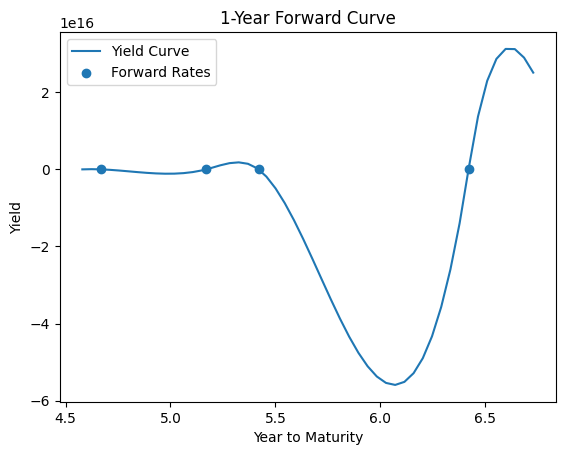

In [80]:
forward_rate_list = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    forward_rate = 0
    for j in range(1,5):
        forward_rate += price_list[j] / ((1+y_new[j*10]/2) ** (2*(5-j)))
    forward_rate_list.append(forward_rate)




## 2.2 5

In [126]:

yield_df = pd.DataFrame(yield_list, columns=['bond_name','coupon','year_to_maturity','ytm'])


yield_return = []
forward_return = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    for j in range(len(price_list)-2):
        yield_return.append(np.log(price_list[j+1]/price_list[j]))
        forward_return.append(np.log((price_list[j+2]+price_list[j+1])/(price_list[j+1]+price_list[j])))

In [127]:

yield_cov = np.cov(yield_return, rowvar=False)
forward_cov = np.cov(forward_return, rowvar=False)

In [128]:
print('Covariance matrix of rate of return：')
print(yield_cov)

Covariance matrix of rate of return：
1.711049347032617e-05


In [129]:
print('Covariance matrix of prospective return：')
print(forward_cov)

Covariance matrix of prospective return：
6.881219007237563e-06


In [130]:
yield_df = pd.DataFrame(yield_list, columns=['bond_name','coupon','year_to_maturity','ytm'])


y1y1_return = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    for j in range(len(price_list)-1):
        y1y1_return.append(np.log(price_list[j+1]/price_list[j]))


y1y1_cov = np.cov(y1y1_return, rowvar=False)


y1y2_return = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    for j in range(len(price_list)-2):
        y1y2_return.append(np.log((price_list[j+1]+price_list[j+2])/(price_list[j]+price_list[j+1])))


y1y2_cov = np.cov(y1y2_return, rowvar=False)


y1y3_return = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    for j in range(len(price_list)-3):
        y1y3_return.append(np.log((price_list[j+2]+price_list[j+3])/(price_list[j]+price_list[j+1])))


y1y3_cov = np.cov(y1y3_return, rowvar=False)


y1y4_return = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    for j in range(len(price_list)-4):
        y1y4_return.append(np.log((price_list[j+3]+price_list[j+4])/(price_list[j]+price_list[j+1])))


y1y4_cov = np.cov(y1y4_return, rowvar=False)

print('1-year-1-year covariance matrix:')
print(y1y1_cov)

print('1-year-2-year covariance matrix:')
print(y1y2_cov)

print('1-year-3-year covariance matrix:')
print(y1y3_cov)

print('1-year-4-year covariance matrix:')
print(y1y4_cov)

1-year-1-year covariance matrix:
1.4822419809805665e-05
1-year-2-year covariance matrix:
6.881219007237563e-06
1-year-3-year covariance matrix:
1.2894290479150623e-05
1-year-4-year covariance matrix:
1.129479643763315e-05


## 2.2 6

In [145]:
log_return_list = []
for i in range(1,11):
    price_list = df.iloc[i,11:19].astype(float).tolist()
    log_return = []
    for j in range(7):
        log_return.append(np.log(price_list[j+1]/price_list[j]))
    log_return_list.append(log_return)


yield_cov_matrix = np.cov(log_return_list)


forward_cov_matrix = yield_cov_matrix[5:,5:]


yield_eig_value, yield_eig_vector = np.linalg.eig(yield_cov_matrix)


forward_eig_value, forward_eig_vector = np.linalg.eig(forward_cov_matrix)

In [146]:
print(yield_eig_value)

[ 1.63550510e-04+0.00000000e+00j  6.20859171e-06+0.00000000e+00j
  2.89409719e-07+0.00000000e+00j  3.01108530e-08+0.00000000e+00j
  1.36410492e-08+0.00000000e+00j  4.87238101e-09+0.00000000e+00j
  3.08247850e-21+1.85890203e-21j  3.08247850e-21-1.85890203e-21j
  9.75154462e-22+0.00000000e+00j -7.78195945e-22+0.00000000e+00j]


In [147]:
print(yield_eig_vector)

[[ 0.1391727 +0.j          0.98247986+0.j         -0.05522033+0.j
  -0.06814619+0.j         -0.02454899+0.j         -0.01901347+0.j
   0.00680775-0.00939j     0.00680775+0.00939j    -0.00688898+0.j
  -0.02153127+0.j        ]
 [ 0.22488979+0.j          0.01879812+0.j          0.31224434+0.j
   0.47305317+0.j          0.23139403+0.j         -0.20988816+0.j
   0.18560099-0.23326294j  0.18560099+0.23326294j -0.2945926 +0.j
  -0.09834313+0.j        ]
 [ 0.25159379+0.j         -0.00442757+0.j          0.06909534+0.j
  -0.21383984+0.j         -0.27094389+0.j          0.58515086+0.j
  -0.11106457+0.07381642j -0.11106457-0.07381642j  0.28513644+0.j
   0.47412118+0.j        ]
 [ 0.2753217 +0.j          0.00809048+0.j          0.443944  +0.j
   0.26318532+0.j         -0.56824227+0.j         -0.33802773+0.j
  -0.05719467+0.13613872j -0.05719467-0.13613872j  0.1001764 +0.j
   0.07355532+0.j        ]
 [ 0.33211762+0.j         -0.09697081+0.j          0.45698389+0.j
  -0.4207748 +0.j         -0.10356

In [150]:
print(forward_eig_value)

[1.11485424e-04 1.20860711e-07 2.68261480e-08 6.36404494e-10
 7.29232165e-09]


In [149]:
print(forward_eig_vector)

[[-0.33853722  0.5259606  -0.62651731 -0.37577479  0.27391123]
 [-0.39514911  0.66108364  0.49303597  0.20493261 -0.34891797]
 [-0.48458327 -0.21186362  0.43178179 -0.04845191  0.72904715]
 [-0.48861466 -0.41231773  0.04157235 -0.576159   -0.507506  ]
 [-0.50565254 -0.2672859  -0.41979497  0.69461439 -0.11898231]]
